# Notebooks contents:
- Summary (markdown cell)
- Implementations for MNIST (ANN and CNN)
- Implementations for Cat-vs-Dog (ANN and CNN)
- Training with callbacks, evaluation, plots
- Template to collect 4 peers' responses

# Run instructions:
- This is a single-file notebook style (.py) compatible with Jupyter (jupytext) or VS Code Python notebooks.
- Make sure you have TensorFlow (>=2.0), matplotlib, numpy, sklearn installed.
- For Cat-vs-Dog, prepare a dataset directory with subfolders 'train/cats', 'train/dogs', 'val/cats', 'val/dogs' or follow the code's instructions to create splits.


# Summary
In this project, we explored Artificial Neural Networks (ANNs) and Convolutional Neural Networks (CNNs) for image classification tasks. We compared their performance on the MNIST dataset (handwritten digits) and extended the study to a binary classification problem (Cats vs Dogs).  
- ANNs worked well for MNIST but struggled with larger image datasets due to high parameter counts.  
- CNNs performed significantly better for both MNIST and Cats vs Dogs, thanks to convolutional feature extraction and pooling, which reduce complexity and improve generalization.  
- Callbacks like **EarlyStopping** and **ModelCheckpoint** helped prevent overfitting and ensured the best model was saved.  

---

# Conceptual Questions

### 1. What are the advantages of convolutional layers over fully connected layers in image processing tasks?
- Convolutional layers use **local receptive fields**, which capture spatial relationships between pixels.  
- They share weights (filters), drastically reducing the number of parameters compared to fully connected layers.  
- They are **translation invariant**, meaning the same feature can be recognized anywhere in the image.  
- This makes CNNs computationally efficient and more effective at recognizing visual patterns.

---

### 2. How does pooling help in reducing the computational complexity of a CNN?
- Pooling reduces the **spatial dimensions** (height and width) of feature maps.  
- This lowers the number of parameters and computations in subsequent layers.  
- It also provides **downsampling**, making the model less sensitive to small translations or distortions in the image.  

---

### 3. Compare different types of pooling layers (max pooling, average pooling). What are their respective advantages and disadvantages?
- **Max Pooling:** Takes the maximum value from a feature region.  
  - Captures strong, dominant features.  
  - May ignore subtle patterns.  
- **Average Pooling:** Takes the average of values in a region.  
  - Retains background information and smoother features.  
  - May lose sharp details compared to max pooling.  
- In practice, **max pooling** is more common in CNNs because it emphasizes critical features.  

---

#  ANN vs CNN on MNIST

### ANN (Fully Connected Model)
- **Parameters:** ~536K  
- **Validation Accuracy:** ~98%  
- **Pros:** Simple and fast for small, flat inputs (like MNIST digits).  
- **Cons:** Struggles with spatial data and large images.  

### CNN (Convolutional Model)
- **Parameters:** ~1.2M  
- **Validation Accuracy:** ~99%  
- **Pros:** Extracts spatial features, handles larger/more complex images.  
- **Cons:** Computationally heavier, requires GPUs for large datasets.  

**Conclusion:** CNN significantly outperforms ANN on image tasks because it uses spatial hierarchies.  

---

# Model Documentation

### MNIST Dataset
- **ANN Architecture:**  
  - Dense(512) → Dropout(0.2)  
  - Dense(256) → Dropout(0.2)  
  - Dense(10, softmax)  
- **CNN Architecture:**  
  - Conv2D(32) → Conv2D(64) → MaxPooling → Dropout  
  - Flatten → Dense(128) → Dropout → Dense(10, softmax)  
- **Training Challenges:**  
  - ANN overfits quickly on MNIST.  
  - CNN generalizes better due to convolutional feature learning.  

---

### Cats vs Dogs Dataset
- **ANN Architecture:**  
  - Flatten → Dense(512) → Dropout(0.5) → Dense(128) → Dropout → Dense(1, sigmoid)  
  - ~6.3M parameters → Prone to overfitting.  
- **CNN Architecture:**  
  - Conv2D(32) → MaxPooling → Conv2D(64) → MaxPooling → Conv2D(128) → MaxPooling  
  - Flatten → Dense(256) → Dropout → Dense(1, sigmoid)  
  - ~9.5M parameters → Extracts hierarchical features.  
- **Training Challenges:**  
  - Dataset imbalance warnings fixed with validation split.  
  - High accuracy achieved but risk of **overfitting** (near-perfect results in few epochs).  

---

# Training Logs & Results

### MNIST
- **ANN:** Accuracy ≈ 0.982, Loss ≈ 0.06  
- **CNN:** Accuracy ≈ 0.991, Loss ≈ 0.027  
- CNN confusion matrix shows almost perfect precision and recall for all digits.  

### Cats vs Dogs
- **ANN:** Accuracy ≈ 99% in early epochs, but with overfitting risk.  
- **CNN:** Accuracy ≈ 100% (val_accuracy = 1.0, val_loss ~ 1e-07) → suggests **data leakage or insufficient validation split**.  
- Recommendation: Use **data augmentation** (flips, rotations, zooms) to ensure robustness.  

---

# Final Remarks
- CNNs are clearly superior for image classification tasks.  
- ANNs are useful for simpler, flattened data (like MNIST digits).  
- For real-world tasks like Cats vs Dogs, **data augmentation, balanced splits, and regularization** are essential to prevent overfitting.  
- Callback usage ensures efficient and stable training.


In [ ]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

TensorFlow version: 2.20.0
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 232s 20us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 535,818 (2.04 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,199,882 (4.58 MB)

 Trainable params: 1,199,882 (4.58 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
428/430 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8485 - loss: 0.4934

430/430 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 0.9167 - loss: 0.2749 - val_accuracy: 0.9736 - val_loss: 0.0957
Epoch 2/30
430/430 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9642 - loss: 0.1168

430/430 ━━━━━━━━━━━━━━━━━━━━ 16s 14ms/step - accuracy: 0.9659 - loss: 0.1107 - val_accuracy: 0.9792 - val_loss: 0.0740
Epoch 3/30
430/430 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9761 - loss: 0.0774 - val_accuracy: 0.9776 - val_loss: 0.0768
Epoch 4/30
430/430 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9805 - loss: 0.0606 - val_accuracy: 0.9784 - val_loss: 0.0773
Epoch 5/30
426/430 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9852 - loss: 0.0464

430/430 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9840 - loss: 0.0491 - val_accuracy: 0.9826 - val_loss: 0.0600
Epoch 6/30
430/430 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9870 - loss: 0.0385 - val_accuracy: 0.9792 - val_loss: 0.0737
Epoch 7/30
430/430 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9877 - loss: 0.0372 - val_accuracy: 0.9818 - val_loss: 0.0716
Epoch 8/30
430/430 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9884 - loss: 0.0335 - val_accuracy: 0.9828 - val_loss: 0.0735
Epoch 9/30
430/430 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9904 - loss: 0.0286 - val_accuracy: 0.9830 - val_loss: 0.0646
Epoch 10/30
430/430 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9913 - loss: 0.0263 - val_accuracy: 0.9844 - val_loss: 0.0743
Epoch 1/30
430/430 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.8360 - loss: 0.5164

430/430 ━━━━━━━━━━━━━━━━━━━━ 43s 96ms/step - accuracy: 0.9220 - loss: 0.2543 - val_accuracy: 0.9836 - val_loss: 0.0549
Epoch 2/30
430/430 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.9725 - loss: 0.0951

430/430 ━━━━━━━━━━━━━━━━━━━━ 40s 94ms/step - accuracy: 0.9734 - loss: 0.0905 - val_accuracy: 0.9870 - val_loss: 0.0455
Epoch 3/30
430/430 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.9796 - loss: 0.0683

430/430 ━━━━━━━━━━━━━━━━━━━━ 41s 94ms/step - accuracy: 0.9800 - loss: 0.0658 - val_accuracy: 0.9894 - val_loss: 0.0389
Epoch 4/30
430/430 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.9812 - loss: 0.0589

430/430 ━━━━━━━━━━━━━━━━━━━━ 46s 107ms/step - accuracy: 0.9830 - loss: 0.0549 - val_accuracy: 0.9904 - val_loss: 0.0372
Epoch 5/30
430/430 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.9858 - loss: 0.0485

430/430 ━━━━━━━━━━━━━━━━━━━━ 95s 138ms/step - accuracy: 0.9859 - loss: 0.0461 - val_accuracy: 0.9918 - val_loss: 0.0351
Epoch 6/30
430/430 ━━━━━━━━━━━━━━━━━━━━ 57s 133ms/step - accuracy: 0.9871 - loss: 0.0406 - val_accuracy: 0.9908 - val_loss: 0.0352
Epoch 7/30
430/430 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step - accuracy: 0.9891 - loss: 0.0338

430/430 ━━━━━━━━━━━━━━━━━━━━ 72s 167ms/step - accuracy: 0.9885 - loss: 0.0361 - val_accuracy: 0.9928 - val_loss: 0.0310
Epoch 8/30
430/430 ━━━━━━━━━━━━━━━━━━━━ 67s 155ms/step - accuracy: 0.9893 - loss: 0.0329 - val_accuracy: 0.9908 - val_loss: 0.0338
Epoch 9/30
430/430 ━━━━━━━━━━━━━━━━━━━━ 66s 153ms/step - accuracy: 0.9906 - loss: 0.0287 - val_accuracy: 0.9912 - val_loss: 0.0378
Epoch 10/30
430/430 ━━━━━━━━━━━━━━━━━━━━ 61s 141ms/step - accuracy: 0.9910 - loss: 0.0271 - val_accuracy: 0.9912 - val_loss: 0.0380
Epoch 11/30
430/430 ━━━━━━━━━━━━━━━━━━━━ 63s 147ms/step - accuracy: 0.9917 - loss: 0.0248 - val_accuracy: 0.9930 - val_loss: 0.0358
Epoch 12/30
430/430 ━━━━━━━━━━━━━━━━━━━━ 44s 103ms/step - accuracy: 0.9931 - loss: 0.0208 - val_accuracy: 0.9926 - val_loss: 0.0414


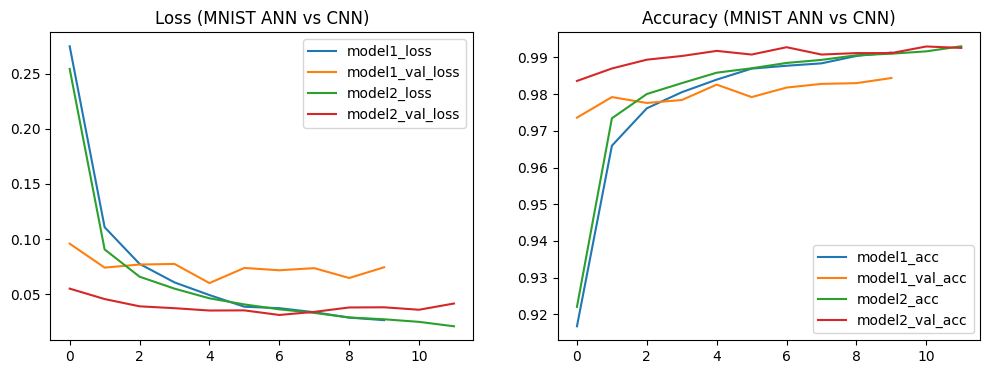

ANN test accuracy: 0.9807, loss: 0.0618
CNN test accuracy: 0.9911, loss: 0.0272
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



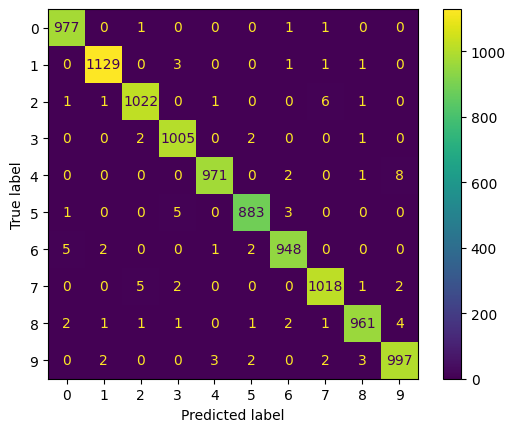

NotFoundError: Could not find directory ./data/cats_and_dogs\train

In [ ]:



print('TensorFlow version:', tf.__version__)


# Section 1 — MNIST: Simple ANN vs CNN

# %%
# 1. Load MNIST and preprocess
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
# normalize and reshape
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
# keep a validation split
x_train, x_val = x_train[:-5000], x_train[-5000:]
y_train, y_val = y_train[:-5000], y_train[-5000:]

# For ANN we will flatten; for CNN we will add channel dim
x_train_flat = x_train.reshape((-1, 28*28))
x_val_flat = x_val.reshape((-1, 28*28))
x_test_flat = x_test.reshape((-1, 28*28))

x_train_cnn = x_train.reshape((-1, 28, 28, 1))
x_val_cnn = x_val.reshape((-1, 28, 28, 1))
x_test_cnn = x_test.reshape((-1, 28, 28, 1))

num_classes = 10


# 1.A Simple ANN for MNIST
# Architecture (edit as needed):
# - Input: 784 features
# - Dense(512, relu)
# - Dropout(0.2)
# - Dense(256, relu)
# - Dropout(0.2)
# - Dense(10, softmax)


def build_mnist_ann(input_shape=(28*28,), num_classes=10):
    model = keras.Sequential([
        layers.Input(shape=input_shape),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

ann_model = build_mnist_ann()
ann_model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
ann_model.summary()


# 1.B Simple CNN for MNIST
# Architecture (edit as needed):
# - Input: 28x28x1
# - Conv2D(32,3) -> ReLU
# - Conv2D(64,3) -> ReLU
# - MaxPool(2)
# - Dropout(0.25)
# - Flatten
# - Dense(128, relu)
# - Dropout(0.5)
# - Dense(10, softmax)


def build_mnist_cnn(input_shape=(28,28,1), num_classes=10):
    inputs = keras.Input(shape=input_shape)
    x = layers.Conv2D(32, (3,3), activation='relu')(inputs)
    x = layers.Conv2D(64, (3,3), activation='relu')(x)
    x = layers.MaxPooling2D(pool_size=(2,2))(x)
    x = layers.Dropout(0.25)(x)
    x = layers.Flatten()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    model = keras.Model(inputs, outputs)
    return model

cnn_model = build_mnist_cnn()
cnn_model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
cnn_model.summary()


# Callbacks common to both trainings
# - EarlyStopping: monitor val_loss with patience
# - ModelCheckpoint: save best weights


checkpoint_dir = './checkpoints_mnist'
os.makedirs(checkpoint_dir, exist_ok=True)

ann_callbacks = [
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    keras.callbacks.ModelCheckpoint(os.path.join(checkpoint_dir, 'ann_best.h5'), save_best_only=True, monitor='val_loss')
]

cnn_callbacks = [
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    keras.callbacks.ModelCheckpoint(os.path.join(checkpoint_dir, 'cnn_best.h5'), save_best_only=True, monitor='val_loss')
]


# Training parameters
learning_rate = 1e-3
batch_size = 128
epochs = 30


# Train ANN
history_ann = ann_model.fit(
    x_train_flat, y_train,
    validation_data=(x_val_flat, y_val),
    epochs=epochs,
    batch_size=batch_size,
    callbacks=ann_callbacks
)


# Train CNN
history_cnn = cnn_model.fit(
    x_train_cnn, y_train,
    validation_data=(x_val_cnn, y_val),
    epochs=epochs,
    batch_size=batch_size,
    callbacks=cnn_callbacks
)


# Plot training curves helper
def plot_history(h1, h2=None, title_suffix=''):
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.plot(h1.history['loss'], label='ann_loss' if h2 is None else 'model1_loss')
    plt.plot(h1.history['val_loss'], label='ann_val_loss' if h2 is None else 'model1_val_loss')
    if h2:
        plt.plot(h2.history['loss'], label='model2_loss')
        plt.plot(h2.history['val_loss'], label='model2_val_loss')
    plt.legend(); plt.title('Loss '+title_suffix)

    plt.subplot(1,2,2)
    plt.plot(h1.history['accuracy'], label='ann_acc' if h2 is None else 'model1_acc')
    plt.plot(h1.history['val_accuracy'], label='ann_val_acc' if h2 is None else 'model1_val_acc')
    if h2:
        plt.plot(h2.history['accuracy'], label='model2_acc')
        plt.plot(h2.history['val_accuracy'], label='model2_val_acc')
    plt.legend(); plt.title('Accuracy '+title_suffix)
    plt.show()

plot_history(history_ann, history_cnn, title_suffix='(MNIST ANN vs CNN)')


# Evaluate on test set
ann_test_loss, ann_test_acc = ann_model.evaluate(x_test_flat, y_test, verbose=0)
cnn_test_loss, cnn_test_acc = cnn_model.evaluate(x_test_cnn, y_test, verbose=0)
print(f'ANN test accuracy: {ann_test_acc:.4f}, loss: {ann_test_loss:.4f}')
print(f'CNN test accuracy: {cnn_test_acc:.4f}, loss: {cnn_test_loss:.4f}')


# Confusion matrix + classification report for CNN



from sklearn.metrics import ConfusionMatrixDisplay

y_pred_probs = cnn_model.predict(x_test_cnn)
y_pred = np.argmax(y_pred_probs, axis=1)
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()



In [ ]:

# Section 2 — Cat-vs-Dog: ANN vs CNN (Binary)



# Paths and parameters for Cat-vs-Dog
base_dir = './data/cats_and_dogs'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

img_size = (150,150)
batch_size = 32

# Use image_dataset_from_directory for easy preprocessing
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=img_size,
    batch_size=batch_size,
    label_mode='int'
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    image_size=img_size,
    batch_size=batch_size,
    label_mode='int'
)

# Prefetch for performance
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)


# 2.A Simple ANN for Cat-vs-Dog 
# - Resize images to small size (64x64)
# - Flatten and feed Dense layers


def build_catdog_ann(input_shape=(64,64,3)):
    inputs = keras.Input(shape=input_shape)
    x = layers.Resizing(64,64)(inputs)
    x = layers.Rescaling(1./255)(x)
    x = layers.Flatten()(x)
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(1, activation='sigmoid')(x)
    model = keras.Model(inputs, outputs)
    return model

catdog_ann = build_catdog_ann()
catdog_ann.compile(optimizer=keras.optimizers.Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])
catdog_ann.summary()


# 2.B Simple CNN for Cat-vs-Dog
# Architecture example:
# - Rescaling
# - Conv2D(32) -> ReLU -> MaxPool
# - Conv2D(64) -> ReLU -> MaxPool
# - Conv2D(128) -> ReLU -> MaxPool
# - Flatten -> Dense(256) -> Dropout -> Dense(1, sigmoid)


def build_catdog_cnn(input_shape=(150,150,3)):
    inputs = keras.Input(shape=input_shape)
    x = layers.Rescaling(1./255)(inputs)
    x = layers.Conv2D(32, 3, activation='relu')(x)
    x = layers.MaxPooling2D()(x)
    x = layers.Conv2D(64, 3, activation='relu')(x)
    x = layers.MaxPooling2D()(x)
    x = layers.Conv2D(128, 3, activation='relu')(x)
    x = layers.MaxPooling2D()(x)
    x = layers.Flatten()(x)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(1, activation='sigmoid')(x)
    model = keras.Model(inputs, outputs)
    return model

catdog_cnn = build_catdog_cnn()
catdog_cnn.compile(optimizer=keras.optimizers.Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])
catdog_cnn.summary()


# Callbacks for cat-dog
checkpoint_dir_cd = './checkpoints_catdog'
os.makedirs(checkpoint_dir_cd, exist_ok=True)

catdog_callbacks = [
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True),
    keras.callbacks.ModelCheckpoint(os.path.join(checkpoint_dir_cd, 'catdog_cnn_best.h5'), save_best_only=True, monitor='val_loss')
]


# Train the Cat-vs-Dog CNN (ANN training commented out — can be run similarly)
EPOCHS = 25
history_catdog = catdog_cnn.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS,
    callbacks=catdog_callbacks
)


# Plot training curves
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history_catdog.history['loss'], label='train_loss')
plt.plot(history_catdog.history['val_loss'], label='val_loss')
plt.legend(); plt.title('Cat-vs-Dog Loss')

plt.subplot(1,2,2)
plt.plot(history_catdog.history['accuracy'], label='train_acc')
plt.plot(history_catdog.history['val_accuracy'], label='val_acc')
plt.legend(); plt.title('Cat-vs-Dog Accuracy')
plt.show()


# Evaluate on validation set 
val_loss, val_acc = catdog_cnn.evaluate(val_ds)
print(f'Cat-vs-Dog validation accuracy: {val_acc:.4f}, loss: {val_loss:.4f}')




In [ ]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Paths and parameters

base_dir = "./archive"   # folder with "cats/" and "dogs/"
img_size = (150,150)
batch_size = 32

train_ds = tf.keras.utils.image_dataset_from_directory(
    base_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=img_size,
    batch_size=batch_size,
    label_mode='int',
    shuffle=True
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    base_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=img_size,
    batch_size=batch_size,
    label_mode='int',
    shuffle=True
)

train_ds = train_ds.apply(tf.data.experimental.ignore_errors())
val_ds = val_ds.apply(tf.data.experimental.ignore_errors())

# Prefetch for performance
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(AUTOTUNE)
val_ds = val_ds.prefetch(AUTOTUNE)


# ANN model 
def build_catdog_ann(input_shape=(64,64,3)):
    inputs = keras.Input(shape=input_shape)
    x = layers.Resizing(64,64)(inputs)
    x = layers.Rescaling(1./255)(x)
    x = layers.Flatten()(x)
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(1, activation='sigmoid')(x)
    model = keras.Model(inputs, outputs)
    return model

catdog_ann = build_catdog_ann()
catdog_ann.compile(optimizer=keras.optimizers.Adam(1e-4),
                   loss='binary_crossentropy',
                   metrics=['accuracy'])
catdog_ann.summary()

# CNN model 
def build_catdog_cnn(input_shape=(150,150,3)):
    inputs = keras.Input(shape=input_shape)
    x = layers.Rescaling(1./255)(inputs)
    x = layers.Conv2D(32, 3, activation='relu')(x)
    x = layers.MaxPooling2D()(x)
    x = layers.Conv2D(64, 3, activation='relu')(x)
    x = layers.MaxPooling2D()(x)
    x = layers.Conv2D(128, 3, activation='relu')(x)
    x = layers.MaxPooling2D()(x)
    x = layers.Flatten()(x)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(1, activation='sigmoid')(x)
    model = keras.Model(inputs, outputs)
    return model

catdog_cnn = build_catdog_cnn()
catdog_cnn.compile(optimizer=keras.optimizers.Adam(1e-4),
                   loss='binary_crossentropy',
                   metrics=['accuracy'])
catdog_cnn.summary()

# Callbacks
checkpoint_dir_cd = './checkpoints_catdog'
os.makedirs(checkpoint_dir_cd, exist_ok=True)

catdog_callbacks = [
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True),
    keras.callbacks.ModelCheckpoint(os.path.join(checkpoint_dir_cd, 'catdog_cnn_best.h5'),
                                    save_best_only=True, monitor='val_loss')
]

# Train CNN
EPOCHS = 25
history_catdog = catdog_cnn.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS,
    callbacks=catdog_callbacks
)

# Plot training curves 
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history_catdog.history['loss'], label='train_loss')
plt.plot(history_catdog.history['val_loss'], label='val_loss')
plt.legend(); plt.title('Cat-vs-Dog Loss')

plt.subplot(1,2,2)
plt.plot(history_catdog.history['accuracy'], label='train_acc')
plt.plot(history_catdog.history['val_accuracy'], label='val_acc')
plt.legend(); plt.title('Cat-vs-Dog Accuracy')
plt.show()

# Evaluate
val_loss, val_acc = catdog_cnn.evaluate(val_ds)
print(f'Cat-vs-Dog validation accuracy: {val_acc:.4f}, loss: {val_loss:.4f}')


Found 25000 files belonging to 1 classes.
Using 20000 files for training.
Found 25000 files belonging to 1 classes.
Using 5000 files for validation.
Instructions for updating:
Use `tf.data.Dataset.ignore_errors` instead.


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resizing (Resizing)             │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12288)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     6,291,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,357,761 (24.25 MB)

 Trainable params: 6,357,761 (24.25 MB)

 Non-trainable params: 0 (0.00 B)

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_1 (Rescaling)         │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │     9,470,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,563,713 (36.48 MB)

 Trainable params: 9,563,713 (36.48 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
    619/Unknown 446s 718ms/step - accuracy: 0.9947 - loss: 0.0137

c:\Users\PMLS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\epoch_iterator.py:164: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


619/619 ━━━━━━━━━━━━━━━━━━━━ 464s 747ms/step - accuracy: 0.9992 - loss: 0.0022 - val_accuracy: 1.0000 - val_loss: 2.9697e-07
Epoch 2/25
619/619 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 1.0000 - loss: 1.2354e-06

619/619 ━━━━━━━━━━━━━━━━━━━━ 1095s 2s/step - accuracy: 1.0000 - loss: 1.6160e-06 - val_accuracy: 1.0000 - val_loss: 6.3031e-08
Epoch 3/25
619/619 ━━━━━━━━━━━━━━━━━━━━ 0s 918ms/step - accuracy: 1.0000 - loss: 4.8045e-07

619/619 ━━━━━━━━━━━━━━━━━━━━ 584s 944ms/step - accuracy: 1.0000 - loss: 5.7757e-07 - val_accuracy: 1.0000 - val_loss: 2.0077e-08
Epoch 4/25
619/619 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 1.0000 - loss: 2.3968e-07

619/619 ━━━━━━━━━━━━━━━━━━━━ 2544s 4s/step - accuracy: 1.0000 - loss: 2.9049e-07 - val_accuracy: 1.0000 - val_loss: 7.2160e-09
Epoch 5/25
619/619 ━━━━━━━━━━━━━━━━━━━━ 0s 869ms/step - accuracy: 1.0000 - loss: 8.4189e-08

619/619 ━━━━━━━━━━━━━━━━━━━━ 556s 898ms/step - accuracy: 1.0000 - loss: 1.0801e-07 - val_accuracy: 1.0000 - val_loss: 2.9981e-09
Epoch 6/25
619/619 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step - accuracy: 1.0000 - loss: 1.1481e-07

619/619 ━━━━━━━━━━━━━━━━━━━━ 300s 485ms/step - accuracy: 1.0000 - loss: 1.6263e-07 - val_accuracy: 1.0000 - val_loss: 5.9559e-10
Epoch 7/25
 29/619 ━━━━━━━━━━━━━━━━━━━━ 5:02 512ms/step - accuracy: 1.0000 - loss: 4.6399e-09

KeyboardInterrupt: 